In [330]:
import pandas as pd
import matplotlib.pyplot as plt

def create_heatmap(df, column, order_columns):
    grouped_df = df.groupby(order_columns).mean().reset_index()
    pivot_df = grouped_df.pivot(index=order_columns[1:], columns=order_columns[0:1], values=column)
    fig, ax = plt.subplots(figsize=(10,2.5))
    im = ax.imshow(pivot_df, cmap='viridis', vmax=1)

    # Set labels and ticks
    ax.set_xticks(range(len(pivot_df.columns)))
    ax.set_yticks(range(len(pivot_df.index)))
    ax.set_xticklabels([], fontsize=6, fontfamily="arial")
    
    # print(pivot_df[0])
    # for i,k in grouped_df.iterrows():
        # print(k["Nucleophile"])
        # print(pivot_df[k][0])
    # print(len(pivot_df))
    index = pivot_df.index.tolist()
    # print(index)
    # for k in column_order:
        # print(k)
    # print(column_order)
    ax.set_yticklabels(index, fontsize=6, fontfamily="arial")
    
    
    ax.set_xlabel(order_columns[0],fontsize=6, fontfamily="arial")
    ax.set_title(order_columns[1:],fontsize=6, fontfamily="arial")

#     plt.setp(ax.get_xticklabels(), ha="right",
#              rotation_mode="anchor")


    # plt.show()
    fig.tight_layout()
    plt.savefig(f'{order_columns[1:]}.png', dpi=300, bbox_inches='tight',pad_inches=0.01)

In [331]:
data = pd.read_excel("9. uHTE_d2b_with_bio_data_compiled_final_results.xlsx")

In [332]:
data.columns

Index(['Notebook', 'Vessel', 'Temperature', '1536loc', 'Sample Name',
       'Location', 'Sample ID', 'Electrophile', 'Electrophile SMILES',
       'Electrophile Conc (M)', 'Nucleophile', 'Nucleophile SMILES',
       'Nucleophile Conc (M)', 'Catalyst1', 'Catalyst1 SMILES',
       'Catalyst1 Conc (M)', 'Ligand1', 'Ligand1 SMILES', 'Ligand1 Conc (M)',
       'Ligand2', 'Ligand2 SMILES', 'Ligand2 Conc (M)', 'Catalyst2',
       'Catalyst2 SMILES', 'Catalyst2 Conc (M)', 'BaseAcid', 'BaseAcid SMILES',
       'BaseAcid Conc (M)', 'ReductantOxidant', 'ReductantOxidant SMILES',
       'ReductantOxidant Conc (M)', 'Additive', 'Additive SMILES',
       'Additive Conc (M)', 'Solvent1', 'Solvent1 percentage', 'Solvent2',
       'Solvent2 percentage', 'bio', 'Substance Smiles', 'Product SMILES',
       'Product', 'Product Output Raw', 'Output Value', 'conv',
       'Product/InternalStandard_ELSD', 'Product/InternalStandard_MSTIC(+)',
       'Product_ELSD', 'Product_MSTIC(+)', 'acid', 'acid/InternalS

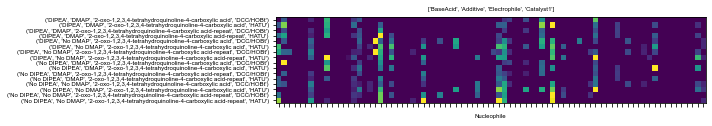

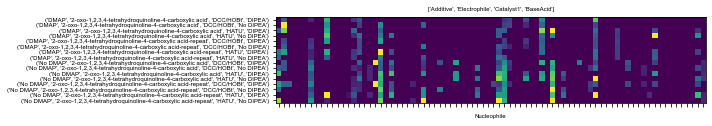

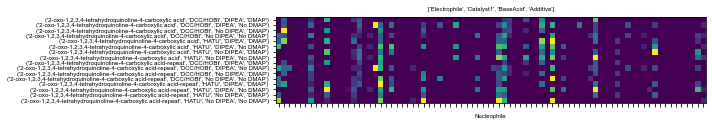

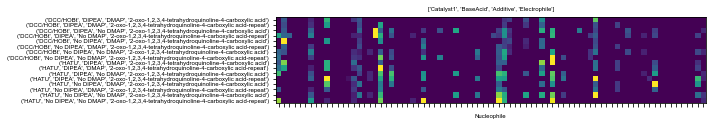

In [334]:
ors = [
    ["Nucleophile","BaseAcid","Additive","Electrophile", "Catalyst1"],
    ["Nucleophile","Additive","Electrophile", "Catalyst1","BaseAcid"],
    ["Nucleophile","Electrophile", "Catalyst1","BaseAcid","Additive"],
    ["Nucleophile", "Catalyst1","BaseAcid","Additive","Electrophile"],

]

for o in ors:
    create_heatmap(data, "Output Value", o)